In [1]:
import sys
import os
import pandas as pd
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [3]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

In [4]:
from ml_models.regression_pipeline import run_model

model, X_train, df_stats = run_model('catboost',use_feature_engineering=True, use_bet_odds=True)

c:\Users\Utilisateur\Desktop\Projets python\horse_racing\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   venue                      63531 non-null  category
 1   config                     63531 non-null  category
 2   surface                    63531 non-null  category
 3   distance                   63531 non-null  category
 4   going                      63531 non-null  category
 5   horse_ratings              63531 non-null  category
 6   race_class                 63531 non-null  category
 7   horse_id                   63531 non-null  int64   
 8   horse_age                  63531 non-null  int64   
 9   horse_country              63531 non-null  category
 10  horse_type                 63531 non-null  category
 11  horse_rating               63531 non-null  category
 12  horse_gear                 63531 non-null  category
 13  declared_weight            63531 non-

In [5]:
df_stats = df_stats.reset_index()
df_stats

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.324009,0,False
1,5078,1598,0,0.118320,0,False
2,5078,1514,0,0.310353,0,False
3,5078,3673,0,0.298583,0,False
4,5078,627,1,0.555515,0,False
...,...,...,...,...,...,...
15911,6348,1238,0,0.253039,0,False
15912,6348,985,0,0.259420,0,False
15913,6348,3147,0,0.256438,0,False
15914,6348,1982,0,0.478649,0,False


## Winning strategies

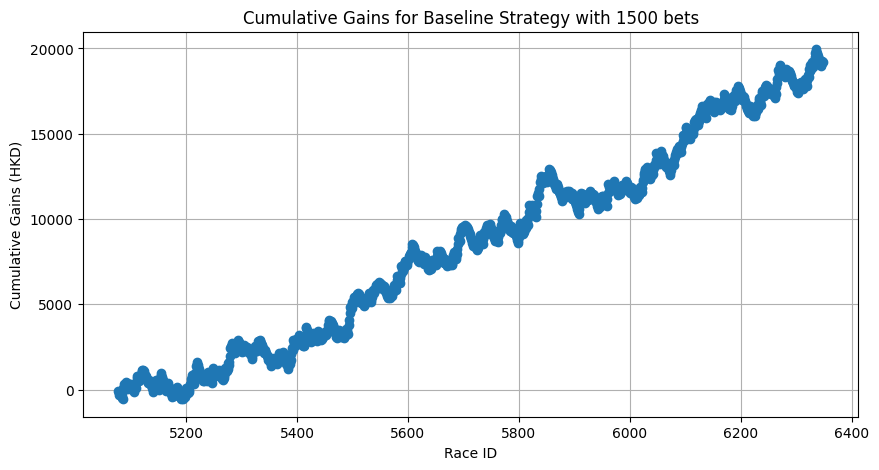

In [6]:
from data_processing.preprocess_data import fetch_winning_dividends
from investment_strategies.baseline_strategy import baseline_strategy
from visualization.plot_results import plot_cumulative_gains 

for i in [1500]:
    df = fetch_winning_dividends(df_stats)
    df = baseline_strategy(df, 100, i)
    plot_cumulative_gains(df, i, "Baseline Strategy")

au hasard

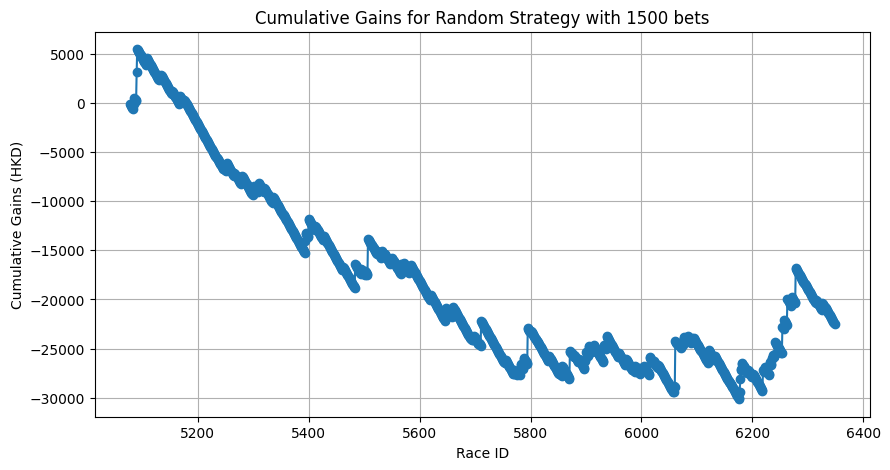

In [7]:
from investment_strategies.random_strategy import random_strategy

for i in [1500]:
    df = fetch_winning_dividends(df_stats)
    df = random_strategy(df, 100, i)

    plot_cumulative_gains(df, i, "Random Strategy")

critère de kelly

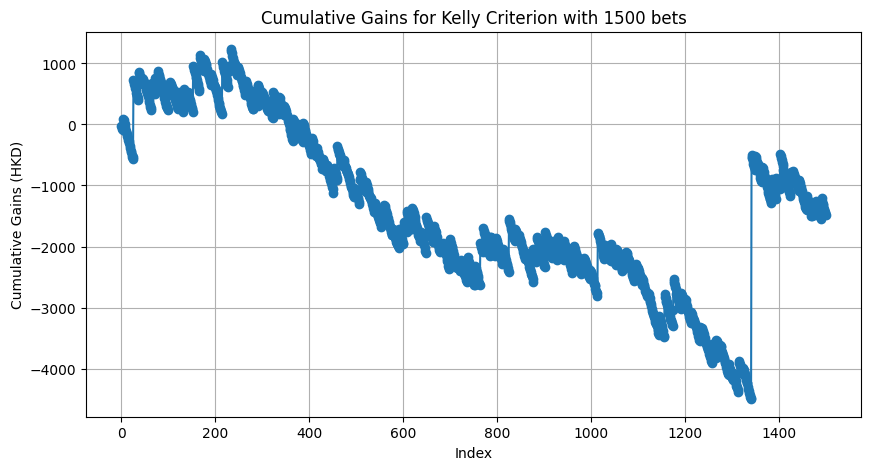

In [8]:
from data_processing.preprocess_data import fetch_winning_dividends_per_prediction
from investment_strategies.Kelly_criterion import kelly_criterion
from visualization.plot_results import plot_cumulative_gains_per_horse

for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = kelly_criterion(df, 100, i, 0.01,calibrate_probabilities=False, single_bet_per_race=False)
    plot_cumulative_gains_per_horse(df, i, "Kelly Criterion")

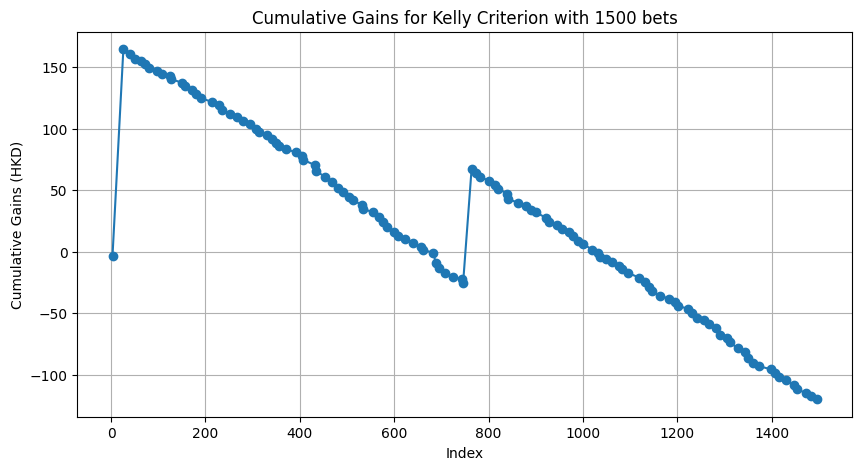

In [9]:
for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = kelly_criterion(df, 100, i, 0.01,calibrate_probabilities=True, single_bet_per_race=True)
    plot_cumulative_gains_per_horse(df, i, "Kelly Criterion")

Kelly fonctionne moins bien car Kelly récompense l'utilisateur si la probabilité de victoire de chaque cheval est vraiment pertinente, donc elle nécessite une précision quanti dingue car elle fonde le montant à parier sur cette proba.

critère de thorp & zembia

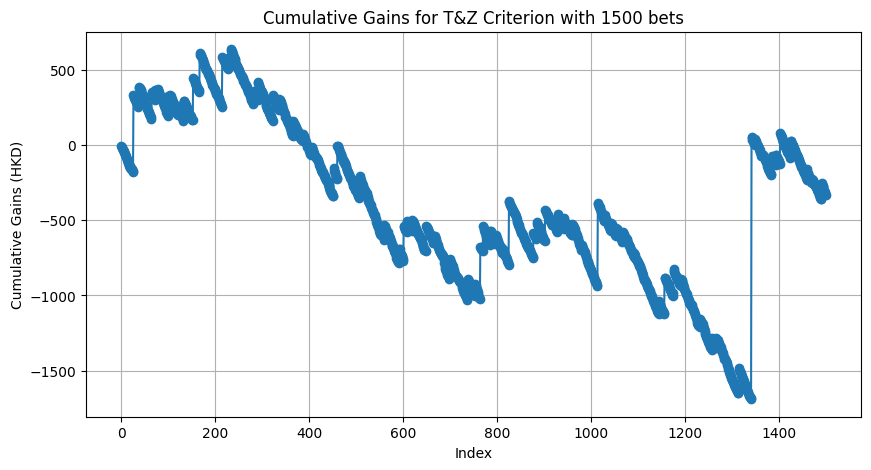

,race_id,horse_id,won,y_predict,win_dividend1,win_odds,num_horses,bet_fraction,bet_amount,gains,cumulative_gains
0,5078,976,0,0.324009,4.40,15.0,14,0.070659,7.065860,-7.065860,-7.065860
1,5078,1598,0,0.118320,4.40,99.0,14,0.041773,4.177269,-4.177269,-11.243128
2,5078,1514,0,0.310353,4.40,25.0,14,0.094367,9.436709,-9.436709,-20.679837
3,5078,3673,0,0.298583,4.40,34.0,14,0.100682,10.068231,-10.068231,-30.748068
4,5078,627,1,0.555515,4.40,4.4,14,0.000000,0.000000,0.000000,-30.748068
...,...,...,...,...,...,...,...,...,...,...,...
1495,5196,459,0,0.356602,13.55,12.0,12,0.103051,10.305082,-10.305082,-294.883386
1496,5196,4307,0,0.152970,13.55,99.0,12,0.072993,7.299257,-7.299257,-302.182643
1497,5196,3525,0,0.387922,13.55,11.0,12,0.110990,11.098992,-11.098992,-313.281635
1498,5196,4275,0,0.159090,13.55,67.0,12,0.071379,7.137865,-7.137865,-320.419500


In [10]:
from data_processing.preprocess_data import fetch_winning_dividends_per_prediction
from investment_strategies.thorp_zembia_criterion import thorp_zembia_criterion 
from visualization.plot_results import plot_cumulative_gains_per_horse

for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = thorp_zembia_criterion(df, 100, i, min_kelly=0.01)
    plot_cumulative_gains_per_horse(df, i, "T&Z Criterion")
df


Pareil, si mon modèle est pas opti, il y aura trop de différences entre le y_predict et les odds, donc l'optimisation quanti va mal se faire

## Model comparison

In [11]:
from ml_models.evaluate import compare_models


model_configs = [
        ('catboost', True, True),
        ('catboost', True, False),
        ('linear_regression', True, True),
        ('linear_regression', True, False)
    ]

compare_models(model_configs=model_configs)

ModuleNotFoundError: No module named 'ml_models.pipeline'